# Introduction to Machine Learning
# Practical Session 06

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

# Ensemble Learning 

Ensembles are methods that combine multiple machine learning models (learners) to create more powerful models. There are many models in the machine learning literature that belong to this category. Commonly used Ensemble Learning techniques include:

### Bagging
Bagging tries to implement the same learners on small sample populations and then takes a mean of all the predictions. In generalized bagging, you can use different learners on different population. As you can expect this helps us to reduce the variance error.

### Boosting 
Boosting is an iterative technique which adjust the weight of an observation based on the last classification. If an observation was classified incorrectly, it tries to increase the weight of this observation and vice versa. Boosting in general decreases the bias error and builds strong predictive models.

### Stacking  
Stacking works in two phases. First, we use multiple base classifiers to predict the class. Second, a new learner is used to combine their predictions with the aim of reducing the generalization error.

### Voting 
Use multiple base classifiers to predict the class and averaging or voting on the result 

In [2]:
!pip install mglearn

# 1. Bagging and Boosting with Decision Trees as Building Blocks 
A Bagging Ensemble model is Random forests. A Boosting Ensemble model is gradient boosted decision trees. Both these models use
decision trees as their building block and have been proven to be effective in a wide range of datasets for classification and regression. Let's compare these machine learning models with Decision Trees, with the "cancer" dataset. 

The Wisconsin Breast Cancer dataset (cancer, for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue. First, let's load the dataset and visualize the data. 

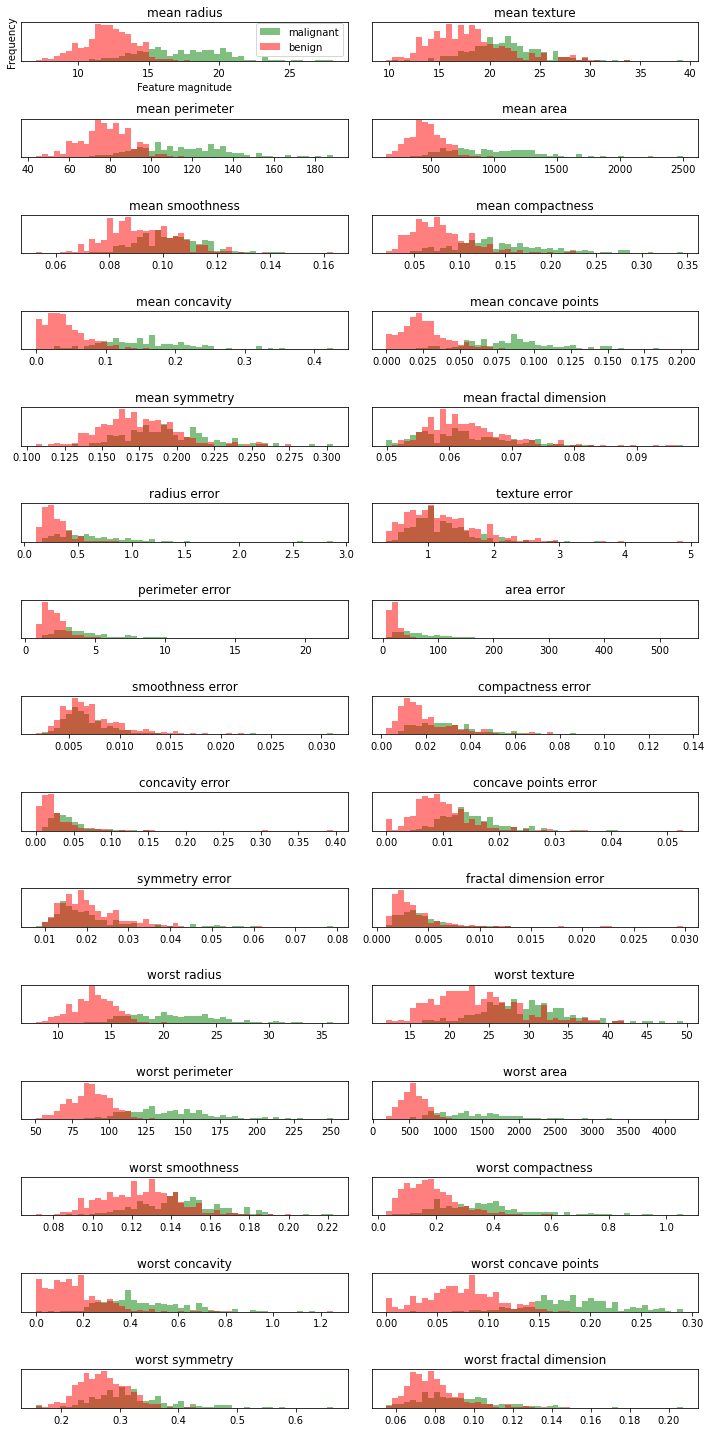

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Visualize each feature ina histogram plot
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='g', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

# 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

The following code trains and tests a Decision Tree classifier on the dataset. 

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(tree.get_depth())

Accuracy on training set: 1.000
Accuracy on test set: 0.937
7


The following code trains and tests a Random Forests classifier (a Bagging Ensemble model) with three estimators. 

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=3, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.944


Increase the number of estimators to 100 and compute the accuracy fo the training and test set. 

In [5]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


The following code loads a GradientBoosting (a Boosting Ensemble model) with 3 estimators. 

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,n_estimators=3)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 0.937


Increase the number of estimators to 100 and compute the accuracy fo the training and test set. 

In [8]:

gbrt = GradientBoostingClassifier(random_state=0,n_estimators=100)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


The following code loads an Ada Boost classifier (a Boosting Ensemble model) with 3 estimators. 

In [9]:

from sklearn.ensemble import AdaBoostClassifier
abrt = AdaBoostClassifier(random_state=0,n_estimators=3)
abrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(abrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(abrt.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.923


Increase the number of estimators to 100 and compute the accuracy fo the training and test set. 

In [10]:

from sklearn.ensemble import AdaBoostClassifier
abrt = AdaBoostClassifier(random_state=0,n_estimators=100)
abrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(abrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(abrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


# 2. Feature importance in trees 

Feature importance is a summary which rates how important each feature is for the decision of a tree or tree-based model.  
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1. 

In [11]:
print("Feature importances:\n{}".format(tree.feature_importances_))
print("Feature importances:\n{}".format(forest.feature_importances_))
print("Feature importances:\n{}".format(gbrt.feature_importances_))
print("Feature importances:\n{}".format(abrt.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
Feature importances:
[0.03428109 0.01603486 0.07742074 0.04462701 0.00756603 0.00421043
 0.05773247 0.10465483 0.00561231 0.00310465 0.01828184 0.00550746
 0.01598658 0.02849289 0.00432991 0.00457692 0.00285285 0.00537969
 0.00521666 0.0038365  0.11200226 0.01973492 0.14912901 0.07116392
 0.00837159 0.01177922 0.02616743 0.13282975 0.00991387 0.00920232]
Feature importances:
[3.33585642e-04 8.46628836e-03 3.43976000e-04 4.26267265e-03
 6.36240698e-04 1.01940737e-03 6.42227404e-04 1.93658823e-02
 1.19454482e-03 6.66278149e-06 3.70887066e-03 3.76565027e-02
 2.79556753e-04 7.68405080e-03 1.17992779e-03 1.58654476e-03
 1.31491952e-03 3.64365226e-04 2.6340

The following function visualizes the feature importances in a way that is similar to the way we visualize
the coefficients in the linear model. 

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

The code below runs the function to visualize the feature importance for the Decision Tree classifer.  

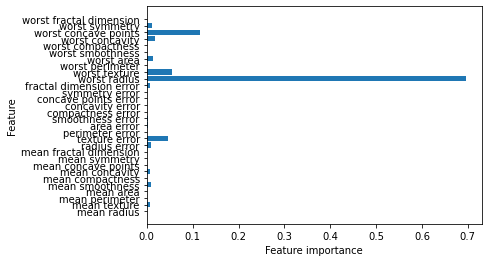

In [13]:
plot_feature_importances_cancer(tree) 

Here we see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well. However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

Run the function to visualize the feature importances for the Random Forest, Gradient Boosting and Adaboost classifers. 

<Figure size 432x288 with 0 Axes>

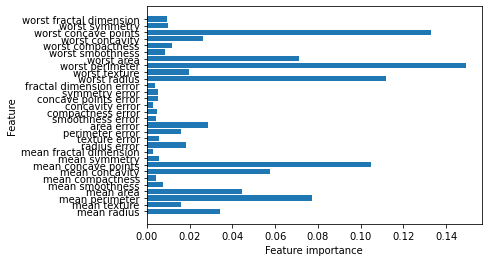

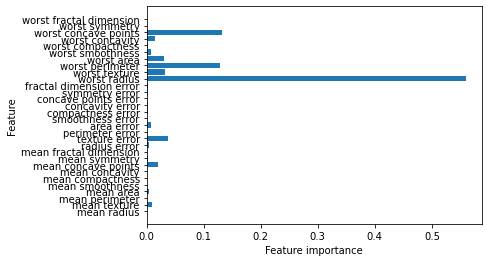

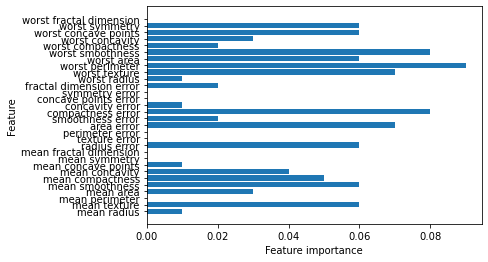

<Figure size 432x288 with 0 Axes>

In [23]:
plot_feature_importances_cancer(forest) 
plt.figure()
plot_feature_importances_cancer(gbrt) 
plt.figure()
plot_feature_importances_cancer(abrt) 
plt.figure()

As you can see, the random forest, gradient boosting and adaboost gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest and gradient boosting also gives a lot of importance to the “worst radius” feature. We can see that the random forest, in particular, captures a much broader picture of the data than a single
tree.

# 3. Random forests and AdaBoost on a 2D dataset 
The followig code loads a 2D dataset and trains a Random Forest classifier with 5 estimators. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_moons
import mglearn

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
forest2D = RandomForestClassifier(n_estimators=5, random_state=2)
forest2D.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=2)

The following code visualizes each separate learner and the probabiltiy distribution of the Random Forest model 

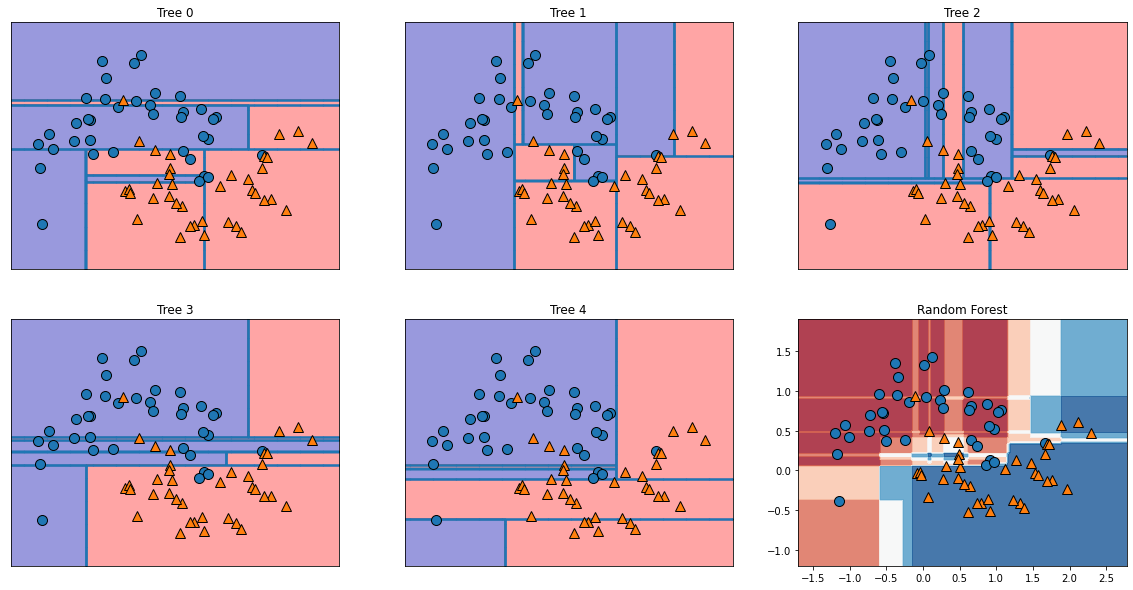

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# create a grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# set color scheme
cm = plt.cm.RdBu

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest2D.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
#     
Z = forest2D.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]    
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm,alpha=.8)
axes[-1, -1].set_title("Random Forest")    
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Train an Adaboost classifer with 5 estimators. Visualizes each separate learner (tree) and the probabiltiy distribution of the Adaboost model.  

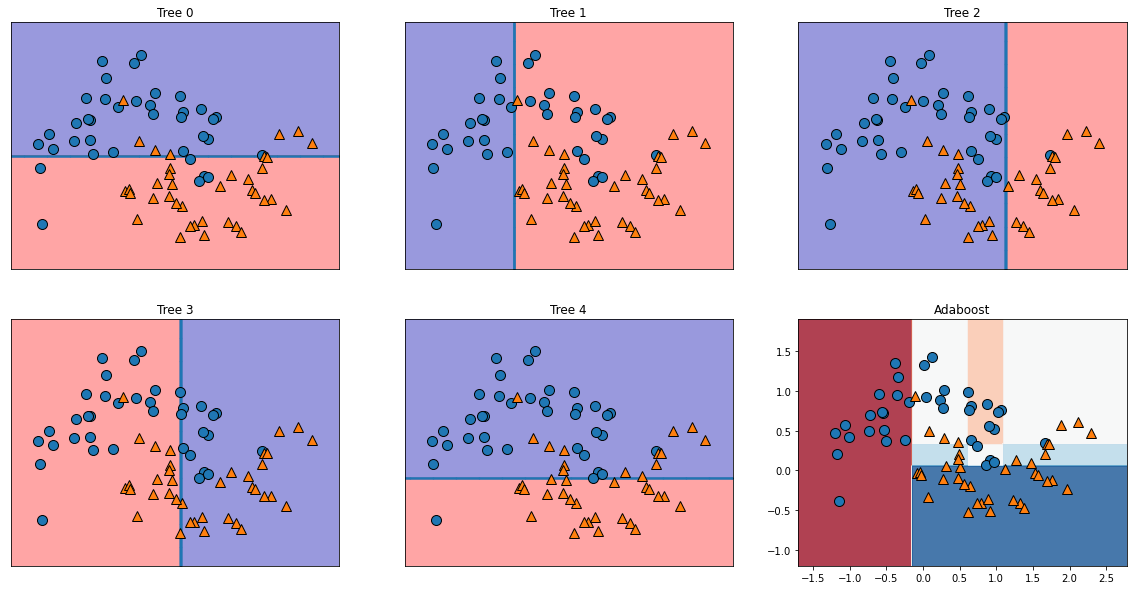

In [26]:
Ada2D=  AdaBoostClassifier(n_estimators=5, random_state=2)
Ada2D.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# create a grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# set color scheme
cm = plt.cm.RdBu


for i, (ax, tree) in enumerate(zip(axes.ravel(), Ada2D.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
    
M= Ada2D.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]    
M = M.reshape(xx.shape)
plt.contourf(xx, yy, M, cmap=cm,alpha=.8)
axes[-1, -1].set_title("Adaboost")    
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# 4. Stacking and Voting
Voting and Stacking use multiple base learners for prediction. These base learners can be different ones.  Voting averages or votes on the result. 

Stacking works in two phases. First, we use multiple base learners (similar to voting). Second, a new learner is used to combine their predictions with the aim of reducing the generalization error. The following code is a simple implementation of Voting with three classfiers. 

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# first we scale the data,
scaler = MinMaxScaler()
scaler.fit(X_train)
# transform data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model1 = DecisionTreeClassifier(random_state=0)
model2 = SVC()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    m = stats.mode([pred1[i], pred2[i]])
    final_pred = np.append(final_pred, m[0])

print("Accuracy: ", np.mean(final_pred - y_test == 0))

Accuracy:  0.9440559440559441


Voting can also be implemented with VotingClassifier from sklearn.  

In [31]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('dt', model1), ('svc', model2)], voting='hard')
model.fit(X_train,y_train)
print("Voting Test score: ", model.score(X_test,y_test))

Voting Test score:  0.9440559440559441


To implement stacking, we take the combined prediction of the Voting classifier as the input to train a 2nd stage 
learner. The following code implements a stacking classifier.

In [32]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', DecisionTreeClassifier(random_state=0)),('svc',  SVC())]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

print("Stacking Test score: ", sclf.score(X_test,y_test))

Stacking Test score:  0.972027972027972


Try different classfiers for stacking and voting.

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

model1 = DecisionTreeClassifier(random_state=0)
model2 = SVC()
model3=LogisticRegression()
model4= SVC(kernel = 'linear')
model5= GaussianNB()
model= VotingClassifier(estimators=[('dt',model1),('svc',model2),('lr',model3),('svc_linear',model4),],voting='hard')
model.fit(X_train,y_train)
print("voting test score:",model.score(X_test,y_test))

voting test score: 0.9790209790209791


In [37]:
model= VotingClassifier(estimators=[('lr',model3),('nb',model5),],voting='soft')
model.fit(X_train,y_train)
print("soft voting test score:",model.score(X_test,y_test))

soft voting test score: 0.9370629370629371


# 5. Ensemble Learning in Regression 
Random forests, Gradient Boosting and Adaboost can be used for regression. The following code generates a 1D sinusoidal dataset with a small amount of Gaussian noise and fits a decision tree
and an Adaboost with 50 estimators. 

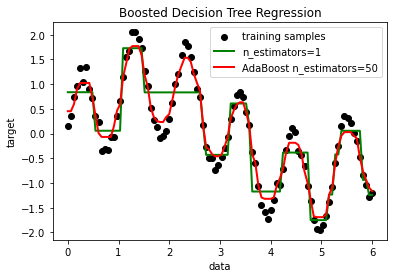

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=50, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="AdaBoost n_estimators=50", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

Fit a `DecisionTreeRegressor`,`AdaBoostRegressor`,`RandomForestRegressor` and `GradientBoostingRegressor` to the dataset. Set `max_depth = 4`. For the ensemble estimators, set `n_estimators = 50`. Plot the results and provide a legend.  

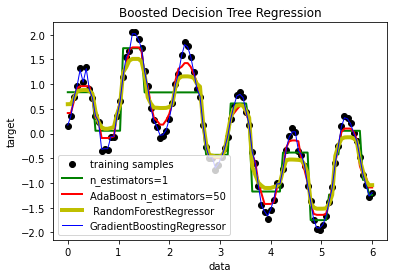

In [43]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=50, random_state=rng)

regr_3 = RandomForestRegressor (max_depth=4)
regr_4 = GradientBoostingRegressor (max_depth=4)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X,y)
regr_4.fit(X,y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)
y_4 = regr_4.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="AdaBoost n_estimators=50", linewidth=2)
plt.plot(X, y_3, c="y", label=" RandomForestRegressor", linewidth=4)
plt.plot(X, y_4, c="b", label="GradientBoostingRegressor", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

The following code implements a Stacking Regressor on a higher dimension dataset. 

In [44]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
estimators = [('lr', RidgeCV()),('dt', DecisionTreeRegressor(max_depth=4))]

sreg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10))
sreg.fit(X_train, y_train)

print("Stacking Test score: ", sreg.score(X_test,y_test))

Stacking Test score:  0.4076861104736167


Compare your solution with a RandomForestRegressor, LinearSVR and Ridge Regressor 

In [46]:
rreg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10))
lreg = StackingRegressor(estimators=estimators,final_estimator=LinearSVR(n_estimators=10))
creg = StackingRegressor(estimators=estimators,final_estimator=RidgeCV(n_estimators=10))
rreg.fit(X_train, y_train)
lreg.fit(X_train, y_train)
creg.fit(X_train, y_train)

print("Stacking Test score: ", rreg.score(X_test,y_test))
print("Stacking Test score: ", lreg.score(X_test,y_test))
print("Stacking Test score: ", creg.score(X_test,y_test))

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

# 6. Advanced Level: Computing a Decision Tree from scratch 
We will learn how to calculate the entropy and information gain for Decision Trees, to create a tree from scratch  

In [47]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

Here ‘eps’ here is the smallest representable number, which makes sure we do not get log(0) or O in a denominator. 
The following code reads the dataset into the pandas dataframe. 

In [48]:
dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
       'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
       'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
       'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}

data = pd.DataFrame(dataset);
display(data)

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No
2,Spicy,Hot,Hard,Yes
3,Spicy,Cold,Hard,No
4,Spicy,Hot,Hard,Yes
5,Sweet,Cold,Soft,Yes
6,Salty,Cold,Soft,No
7,Sweet,Hot,Soft,Yes
8,Spicy,Cold,Soft,Yes
9,Salty,Hot,Hard,Yes


## Finding the information gain
To find the information gain, we first need to calculate the entropy. The equation for entropy is
\begin{equation}
- \sum^{N}_{i = 1}p_{i}\log p_{i}
\end{equation} 
Here $p_{i}$, the fraction of a number of elements in that split group over the number of total elements in the group. In this classification tree, we select those attributes that achieves the greatest reduction in entropy to split the tree. The reduction (or change) in entropy is measured by Information Gain
\begin{equation}
IG = E_{0} - \sum^{a}_{i = 1}\frac{N_{i}}{N}E_{i}
\end{equation}
Where $E_{0}$ is the entropy of the prior.

1. Calculate the prior entropy $E_{0}$, which is the entropy of the target variable. 
Note that $p_{yes}$ is the number of "Yes" elements divided by the total number of elements (6/10) and $p_{no}$  is the number of "No" elements divided by the total number of elements (4/10). 

In [52]:
entropy_0 = 0  #Initialize Entropy
values = data.Eat.unique()  #Unique objects - 'Yes', 'No'
print(values)
print(data.Taste.unique())

#
# Your code goes here 
#
for value in values: 
    print(value)
    fraction = data.Eat.value_counts()[value]/len(data.Eat)
    print(fraction)
    entropy_0=entropy_0 - fraction*np.log2(fraction)
print(entropy_0)

['No' 'Yes']
['Salty' 'Spicy' 'Sweet']
No
0.4
Yes
0.6
0.9709505944546686


2.  The entropy of each feature is $\sum^{a}_{i = 1}\frac{N_{i}}{N}E_{i}$. The code below is a function which computes the entropy for an attribute. 

In [54]:
#
# Create a function to calcuate the entropy
# 
def feature_entropy(data, attribute, target_variables):
    variables = data[attribute].unique()    #This gives different features in that attribute (like 'Sweet')
    entropy = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
#            print(target_variable)
            num = len(data[attribute][data[attribute]==variable][data.Eat ==target_variable]) #numerator
            den = len(data[attribute][data[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
#            print(num, den, fraction)
            entropy_each_feature = entropy_each_feature -fraction*np.log2(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(data)
        entropy = entropy + fraction2*entropy_each_feature   #Sums up all the entropy ETaste
    return entropy   
        

The code below computes the entropy for the 'Taste' feature

In [59]:
#find the entropy for Taste 
target_variables = data.Eat.unique()  #This gives all 'Yes' and 'No'
entropy_taste = feature_entropy(data,'Taste',target_variables)
print(entropy_taste)    



0.7609640474436806


Compute the entropy for the other two features

In [60]:
#
entropy_temp = feature_entropy(data, 'Temperature', target_variables)
print(entropy_temp)

entropy_text= feature_entropy(data, 'Texture', target_variables)
print(entropy_text)

0.950977500432693
0.9245112497836524


3. Find the information gain for each feature by subtracting the total entropy of each feature from the prior entropy. (eg $IG_{taste} = E_{0} - E_{taste}$). 

In [61]:
IG_taste = entropy_0 - entropy_taste
IG_temp= entropy_0 -entropy_temp
IG_texture= entropy_0 - entropy_text
print(["IG_taste =", IG_taste,"IG_temp=", IG_temp,"IG_texture=",IG_texture])

['IG_taste =', 0.20998654701098796, 'IG_temp=', 0.019973094021975557, 'IG_texture=', 0.04643934467101618]


4. You will find the feature (attribute) with the most information gain is "Taste". The following code 
create the subtrees for each "Taste".

In [53]:
attribute = 'Taste'
variables = data[attribute].unique() 
print(variables)
print(data[data['Taste'] == variables[0]])

data1a = data[data['Taste'] == variables[0]].reset_index(drop=True)
display(data1a)

data2a = data[data['Taste'] == variables[1]].reset_index(drop=True)
display(data2a)

data3a = data[data['Taste'] == variables[2]].reset_index(drop=True)
display(data3a)

['Salty' 'Spicy' 'Sweet']
   Taste Temperature Texture  Eat
0  Salty         Hot    Soft   No
6  Salty        Cold    Soft   No
9  Salty         Hot    Hard  Yes


,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Salty,Cold,Soft,No
2,Salty,Hot,Hard,Yes


,Taste,Temperature,Texture,Eat
0,Spicy,Hot,Soft,No
1,Spicy,Hot,Hard,Yes
2,Spicy,Cold,Hard,No
3,Spicy,Hot,Hard,Yes
4,Spicy,Cold,Soft,Yes


,Taste,Temperature,Texture,Eat
0,Sweet,Cold,Soft,Yes
1,Sweet,Hot,Soft,Yes


5. You can see that the "Sweet" subtree is fully separated. Split the remaining two subtrees (data1a and data2a)

In [62]:
data1a, data2a, data1a, data2a = train_test_split(data1a, data2a, stratify=y, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [3, 5]